In [1]:
# 사용가능한 시스템의 TTF 폰트 목록
import matplotlib.font_manager as font_manager
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

print('사용가능한 TTF 폰트 개수:', len(font_list))

for f in font_list :
    if 'Na' in f :
        print(f)


사용가능한 TTF 폰트 개수: 389


In [7]:
import pandas as pd
import numpy as np

In [3]:
#폰트 연결

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


In [91]:
df = pd.read_csv("C:/Rwork/03_암발생자수.csv", encoding="cp949") 
df

,24개 암종별,성별,연령별,2019,2019.1
0,24개 암종별,성별,연령별,발생자수 (명),조발생률 (명/10만명)
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [92]:
# 열명 변경
df.columns = ["암종별","성별","연령별","발생자수","조발생률"]
# 열 데이터 타입 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1501 non-null   object
 1   성별      1501 non-null   object
 2   연령별     1501 non-null   object
 3   발생자수    1501 non-null   object
 4   조발생률    1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


,암종별,성별,연령별,발생자수,조발생률
0,24개 암종별,성별,연령별,발생자수 (명),조발생률 (명/10만명)
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0


In [ ]:
# 1) 특정 변수 조회
df['암종별']

In [24]:
# 행, 열 조회
df.index
df.columns
df.loc[0,'암종별']

'24개 암종별'

In [93]:
df.iloc[0,0]

'24개 암종별'

In [96]:
df = df.loc[1:,:]
df

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
5,모든 암(C00-C96),계,15-19세,583,21.4
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [30]:
# 특정 행,열 자료 추출
df.loc[[1,3],['암종별', '발생자수']]

,암종별,발생자수
1,모든 암(C00-C96),254718
3,모든 암(C00-C96),220


In [37]:
df['발생자수'] = np.where(df['발생자수'] == '-', 0, df['발생자수'])
df['조발생률'] = np.where(df['조발생률'] == '-', 0, df['조발생률'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int32  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 52.9+ KB


In [34]:
# 데이터 타입변경 1
df['발생자수'] = df['발생자수'].astype('int')

In [36]:
# 데이터 타입변경 2 (수치데이터는 알아서 타입변환됨)
df['조발생률'] = pd.to_numeric(df['조발생률'])

In [ ]:
# 암종류 - list로 형변환해서 써야 편함
lt = list(df['암종별'].unique())
lt = [s[-3:-1]for s in lt]
lt

In [ ]:
lt = [int(s) for s in lt]
lt

In [94]:
def funCol(col,df):
  temp = list(df[col]) 
  temp = [float(s.replace('-','0')) for s in temp]
  df[col] = temp


for c in collection
range(1,6) = (1,2,3,4,5)

In [97]:
for c in ['발생자수','조발생률']:
  funCol(c, df)

C:\Users\user\AppData\Local\Temp\ipykernel_1804\1574088642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = temp


In [ ]:
df.info()

In [99]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718.0,496.2
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4


In [115]:
df1 = df[(df['암종별'] == '모든 암(C00-C96)') & (df['연령별'] != '계') & (df['성별'] == "계")][['연령별','발생자수','조발생률']]
df1 = df1[(df1['연령별'] != '연령미상')]


In [116]:
df1 = df1.set_index('연령별')

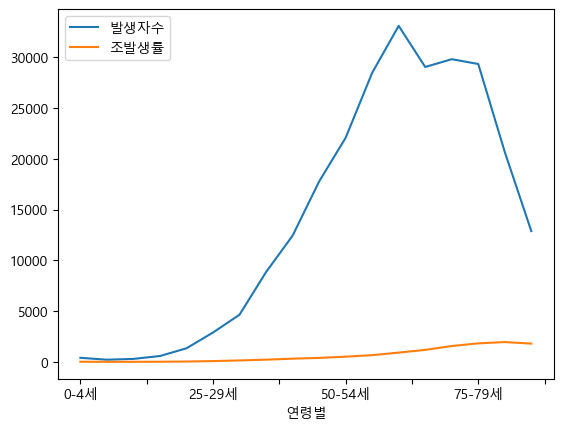

In [117]:
df1.plot()
plt.show()

In [118]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718.0,496.2
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4


In [128]:
df2 = df[(df['연령별'] != '계') & (df['암종별'] != '모든 암(C00-C96)') & (df['성별'] != "계")]
df2

,암종별,성별,연령별,발생자수,조발생률
82,"입술, 구강 및 인두(C00-C14)",남자,0-4세,0.0,0.0
83,"입술, 구강 및 인두(C00-C14)",남자,5-9세,1.0,0.1
84,"입술, 구강 및 인두(C00-C14)",남자,10-14세,3.0,0.3
85,"입술, 구강 및 인두(C00-C14)",남자,15-19세,7.0,0.5
86,"입술, 구강 및 인두(C00-C14)",남자,20-24세,18.0,1.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096.0,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357.0,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420.0,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273.0,243.6


In [129]:
df2.groupby(['암종별','성별']).mean()[['발생자수', '조발생률']]

발생자수        조발생률
암종별                   성별                         
간(C22)                남자   607.421053   63.189474
                      여자   213.894737   20.931579
갑상선(C73)              남자   395.578947   23.210526
                      여자  1218.947368   69.421053
고환(C62)               남자    17.105263    1.031579
                      여자     0.000000    0.000000
기타 암(Re. C00-C96)     남자   548.578947   68.663158
                      여자   542.736842   52.952632
난소(C56)               남자     0.000000    0.000000
                      여자   152.000000   10.331579
뇌 및 중추신경계(C70-C72)    남자    56.315789    5.436842
                      여자    47.947368    3.936842
다발성 골수종(C90)          남자    52.473684    6.189474
                      여자    43.894737    3.942105
담낭 및 기타 담도(C23-C24)   남자   205.052632   30.721053
                      여자   183.526316   20.842105
대장(C18-C20)           남자   901.000000  101.589474
                      여자   626.894737   59.568421
방광(C67)               남자   209.684211   31.547368
                      여자    47.947368    5.210526
백혈병(C91-C95)          남자   110.947368   10.963158
                      여자    85.789474    7.021053
비호지킨 림프종(C82-C86,C96) 남자   164.052632   17.447368
                      여자   119.526316   10.294737
식도(C15)               남자   135.421053   15.984211
                      여자    15.631579    1.331579
신장(C64)               남자   218.684211   18.568421
                      여자    98.473684    7.505263
위(C16)                남자  1040.052632  112.547368
                      여자   512.210526   45.457895
유방(C50)               남자     5.947368    0.715789
                      여자  1306.315789   77.063158
입술, 구강 및 인두(C00-C14)  남자   150.684211   14.226316
                      여자    58.210526    4.647368
자궁경부(C53)             남자     0.000000    0.000000
                      여자   172.263158   11.510526
자궁체부(C54)             남자     0.000000    0.000000
                      여자   173.000000   10.336842
전립선(C61)              남자   884.368421  119.973684
                      여자     0.000000    0.000000
췌장(C25)               남자   218.421053   27.663158
                      여자   207.842105   21.426316
폐(C33-C34)            남자  1070.052632  153.015789
                      여자   506.789474   48.173684
호지킨 림프종(C81)          남자     9.526316    0.678947
                      여자     6.684211    0.515789
후두(C32)               남자    60.736842    7.105263
                      여자     3.578947    0.347368

In [124]:
import seaborn as sns

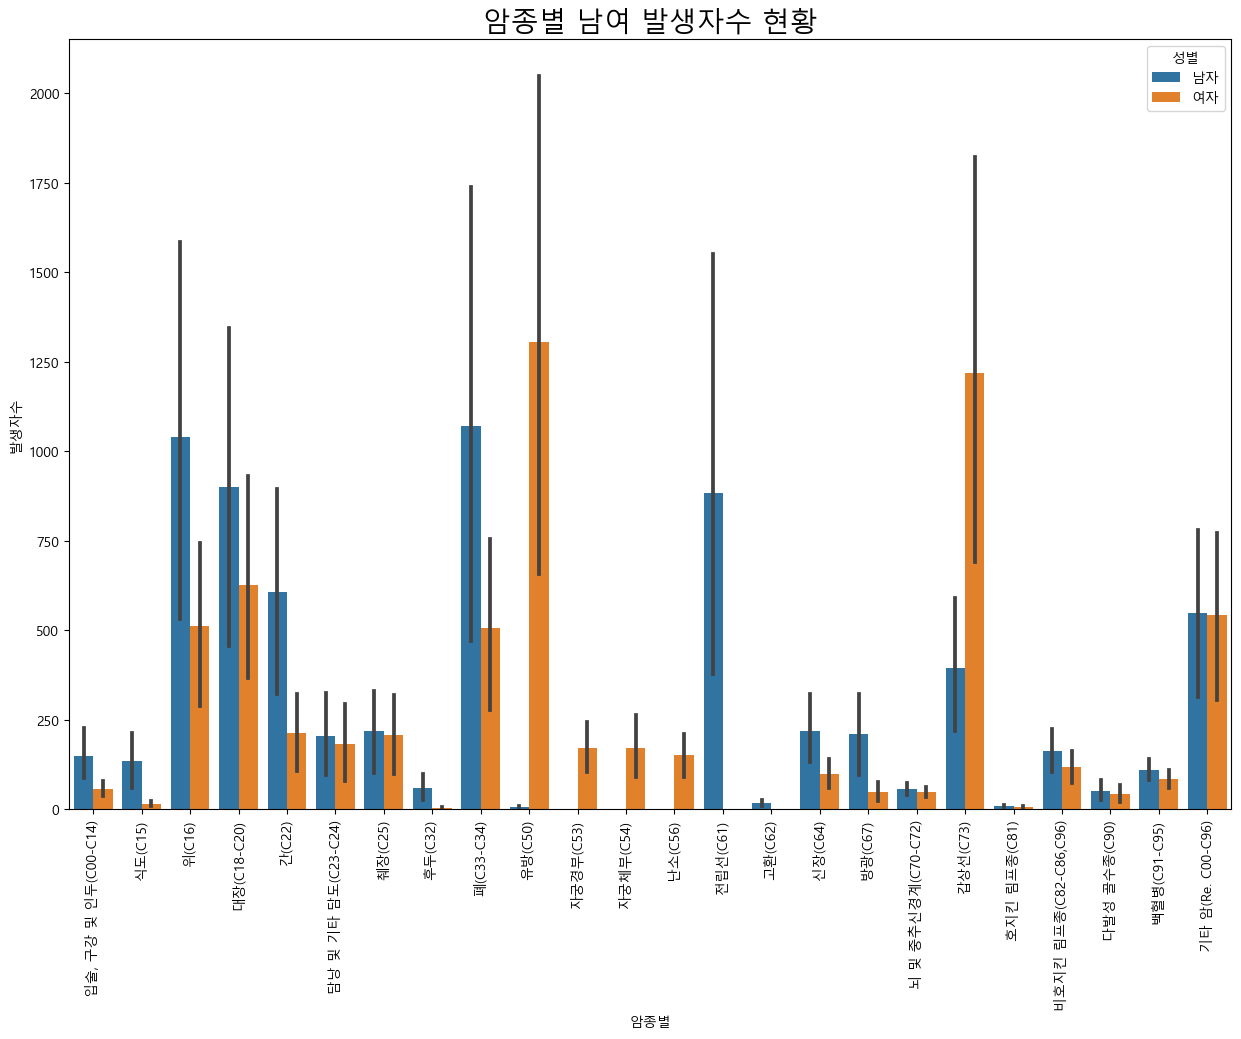

In [133]:
plt.figure(figsize=(15,10))
sns.barplot(x='암종별', y='발생자수',hue='성별', data=df2)
plt.title('암종별 남여 발생자수 현황', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df2 = df[(df['연령별'])]